In [1]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [3]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

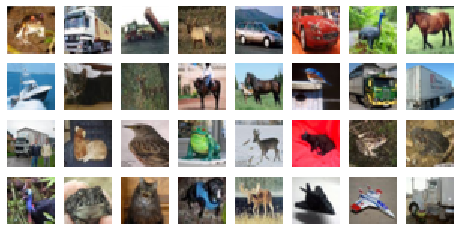

In [4]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [5]:
# 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
data_generator = ImageDataGenerator(rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True)

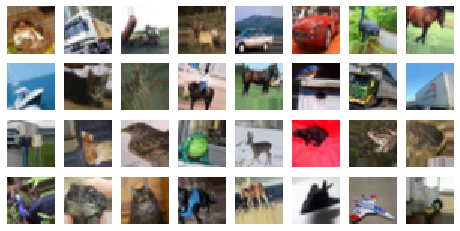

In [6]:
# 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
# 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。(shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int")) # 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int


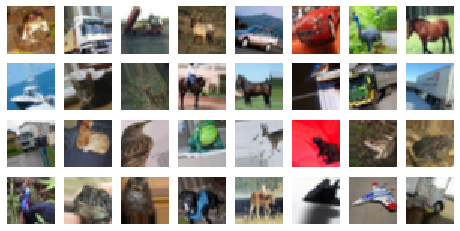

In [7]:
# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

## 作業

請使用 ImageDataGenerator 來進行 Cifar-10 資料集的訓練，並觀察不同的圖像增強方法是否會顯著影響訓練結果

In [8]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [9]:
# 此函數會幫我們把多張影像畫成一張多宮格圖
def img_combine(img, ncols=8, size=1, path=False):
    from math import ceil
    import matplotlib.pyplot as plt
    import numpy as np
    nimg = len(img)
    nrows = int(ceil(nimg/ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols*size,nrows*size))
    if nrows == 0:
        return
    elif ncols == 1:
        for r, ax in zip(np.arange(nrows), axes):
            nth=r
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                
            ax.set_axis_off()
    elif nrows == 1:
        for c, ax in zip(np.arange(ncols), axes):
            nth=c
            if nth < nimg:
                ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
            ax.set_axis_off()
    else:
        for r, row in zip(np.arange(nrows), axes):
            for c, ax in zip(np.arange(ncols), row):
                nth=r*ncols+c
                if nth < nimg:
                    ax.imshow(img[nth], cmap='rainbow', vmin=0, vmax=1)
                ax.set_axis_off()
    plt.show()

In [10]:
# 讀取 Cifar-10 資料集
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

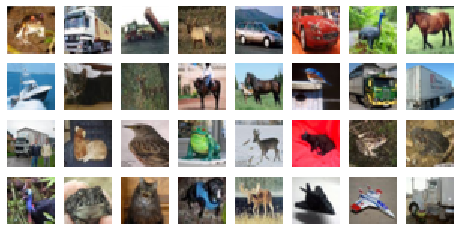

In [11]:
# 取前 32 張圖片做視覺化
images = x_train[:32]
img_combine(images)

In [12]:
def image_data_generator(featurewise_center, featurewise_std_normalization, samplewise_center, samplewise_std_normalization, zca_whitening, rotation_range, width_shift_range, height_shift_range, horizontal_flip) :

    # 建立 ImageDataGenerator，並指定我們要做資料增強的數值範圍
    data_generator = ImageDataGenerator(
        
        featurewise_center=featurewise_center,
        featurewise_std_normalization=featurewise_std_normalization,
        
        samplewise_center=samplewise_center,
        samplewise_std_normalization=samplewise_std_normalization,
        
        zca_whitening=zca_whitening,
        
        rotation_range=rotation_range,
        
        width_shift_range=width_shift_range,
        height_shift_range=height_shift_range,
        
        horizontal_flip=horizontal_flip)

    # 注意！！ ImageDataGenerator 是一個 Generator (生成器)! 對 Generator 不熟悉的同學請回到 Day098 做複習。
    # 使用 .flow 後，就會對我們的影像進行增強，再 call next 取出 generator 的圖像。
    # (shuffle=False 因為我們希望圖像的順序不要改變，方便觀察。實際訓練時預設是 shuffle=True) 
    augmented_iamges = next(data_generator.flow(images, shuffle=False))
    return augmented_iamges

/Users/johnsonhuang/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:1131: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/johnsonhuang/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:1139: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


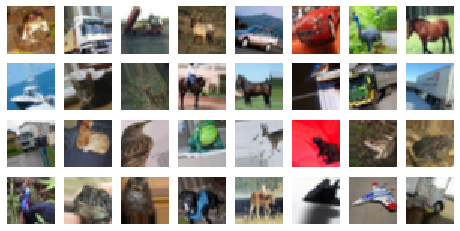

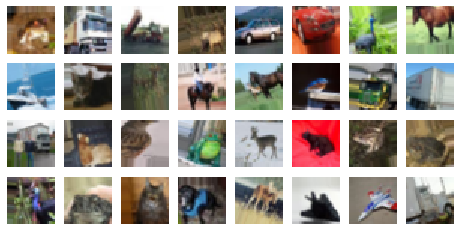

In [13]:
image_data_generator(featurewise_center=True, featurewise_std_normalization=True, samplewise_center=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=0, width_shift_range=0, height_shift_range=0, horizontal_flip=False)

# 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int
img_combine(augmented_iamges.astype("int")) 

# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

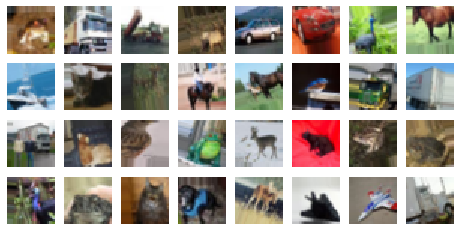

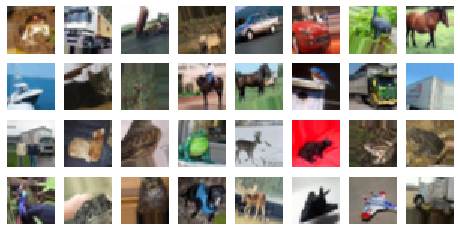

In [14]:
image_data_generator(featurewise_center=False, featurewise_std_normalization=False, samplewise_center=True, samplewise_std_normalization=True, zca_whitening=False, rotation_range=0, width_shift_range=0, height_shift_range=0, horizontal_flip=False)

# 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int
img_combine(augmented_iamges.astype("int")) 

# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

/Users/johnsonhuang/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:836: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/johnsonhuang/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:1150: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


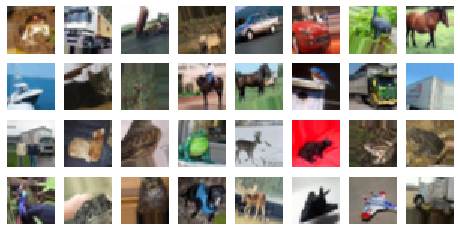

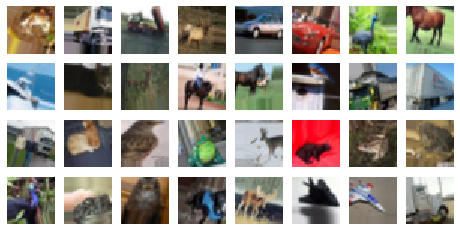

In [15]:
image_data_generator(featurewise_center=False, featurewise_std_normalization=False, samplewise_center=False, samplewise_std_normalization=False, zca_whitening=True, rotation_range=0, width_shift_range=0, height_shift_range=0, horizontal_flip=False)

# 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int
img_combine(augmented_iamges.astype("int")) 

# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

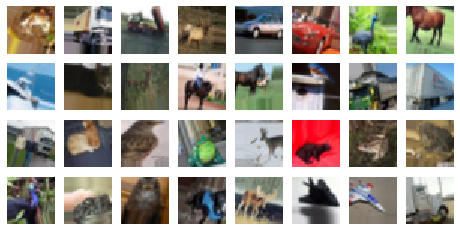

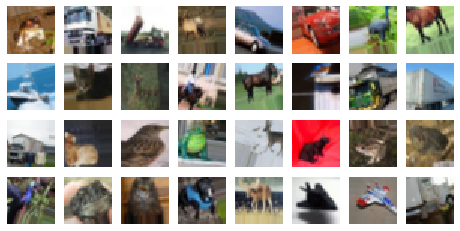

In [16]:
image_data_generator(featurewise_center=False, featurewise_std_normalization=False, samplewise_center=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=30, width_shift_range=0.5, height_shift_range=0.5, horizontal_flip=False)

# 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int
img_combine(augmented_iamges.astype("int")) 

# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

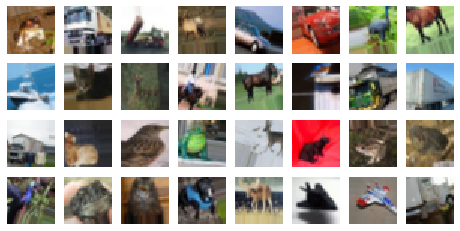

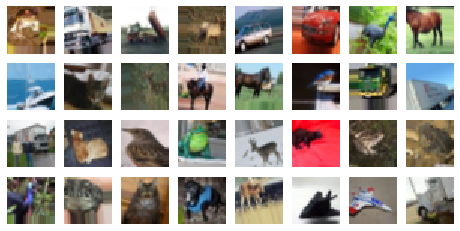

In [17]:
image_data_generator(featurewise_center=False, featurewise_std_normalization=False, samplewise_center=False, samplewise_std_normalization=False, zca_whitening=False, rotation_range=0, width_shift_range=0, height_shift_range=0, horizontal_flip=True)

# 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int
img_combine(augmented_iamges.astype("int")) 

# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=False))
img_combine(augmented_iamges.astype("int"))

/Users/johnsonhuang/.local/lib/python3.6/site-packages/keras_preprocessing/image.py:841: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


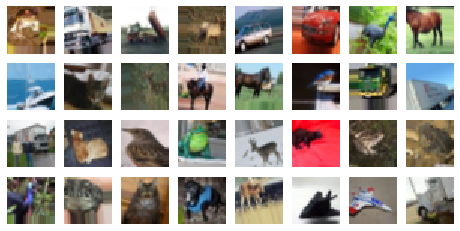

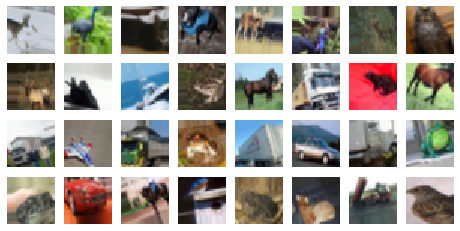

In [19]:
image_data_generator(featurewise_center=True, featurewise_std_normalization=True, samplewise_center=True, samplewise_std_normalization=True, zca_whitening=True, rotation_range=30, width_shift_range=0.8, height_shift_range=0.5, horizontal_flip=True)

# 注意在訓練時神經網路時，圖像資料必須要是 float32，但在做視覺化時要轉為 int 才能順利畫圖。所以為了畫圖才把資料轉為 int
img_combine(augmented_iamges.astype("int")) 

# 因為隨機性的關係，所以一樣的圖像再經過一次 generator 後的結果不一定相同
augmented_iamges = next(data_generator.flow(images, shuffle=True))
img_combine(augmented_iamges.astype("int"))

## ANS 版本

In [ ]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam

batch_size = 128 # batch 的大小，如果出現 OOM error，請降低這個值
num_classes = 10 # 類別的數量，Cifar 10 共有 10 個類別
epochs = 10 # 訓練的 epochs 數量

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

augment_generator = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

history = model.fit_generator(augment_generator.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=int(len(x_train)/batch_size), # 一個 epochs 要執行幾次 update，通常是資料量除以 batch size
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## 補充資料

## [Keras ImageDataGenerator 範例與介紹](https://zhuanlan.zhihu.com/p/30197320)



## <font color="orange">1. 考慮整個數據集的分佈 featurewise </font>

> ### datagen = image.ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

    featurewise_center : Set input mean to 0 over the dataset, feature-wise
    
    samplewise_std_normalization : Divide inputs by std of the dataset, feature-wise
    
大意為將輸入的每個樣本除以其自身的標準差。這兩個參數都是<font color="red">從數據集整體</font>上對每張圖片進行標準化處理


## <font color="orange">2. 針對自身圖片 samplewise </font>

> ### datagen = image.ImageDataGenerator(samplewise_center=True, samplewise_std_normalization=True)


    samplewise_center : Set each sample mean to 0
    
    samplewise_std_normalization : Divide each input by its std
    
    
將輸入的每個樣本除以其自身的標準差。

這個與featurewise的處理不同，<font color="red">featurewise是從整個數據集的分佈去考慮的，而samplewise只是針對自身圖片</font>


## <font color="orange">3. 降維 zca whitening </font>

> ### datagen = image.ImageDataGenerator(zca_whitening=True)


zca白化的作用是針對圖片進行PCA降維操作，減少圖片的冗餘信息，保留最重要的特徵，

細節可參看：[Whitening transformation--維基百科](https://link.zhihu.com/?target=https%3A//en.wikipedia.org/wiki/Whitening_transformation)，[Whitening--斯坦福](https://link.zhihu.com/?target=http%3A//ufldl.stanford.edu/wiki/index.php/Whitening)。
    

## <font color="orange">4. 幅度內 旋轉 rotation range</font>

> ### datagen = image.ImageDataGenerator(rotation_range=30)


rotation range的作用是用戶指定旋轉角度範圍，其參數只需指定一個整數即可，

但<font color="red">並不是固定</font>以這個角度進行旋轉，而是<font color="red">在 $ [0, 指定角度] $ 範圍內進行隨機角度旋轉</font>
    

## <font color="orange">5. 幅度內 平移 shift range </font>

> ### datagen = image.ImageDataGenerator(width_shift_range=0.5,height_shift_range=0.5)


其最大平移距離為圖片長或寬的尺寸乘以參數，<font color="red">同樣平移距離並不固定為最大平移距離，平移距離在 $ [0, 最大平移距離] $ 區間內</font>


平移圖片的時候一般會出現超出原圖範圍的區域，這部分區域會根據fill_mode的參數來補全，具體參數看下文。當參數設置過大時，會出現圖7的情況，因此盡量不要設置太大的數值。

![img7](https://pic2.zhimg.com/80/v2-9aff91273a5b9ef1a1cc7f04c135efd9_hd.jpg)

    

## <font color="orange">6. 錯切 shear range</font>

> ### datagen = image.ImageDataGenerator(shear_range=0.5)


shear_range就是錯切變換，效果就是讓所有點的x坐標(或者y坐標)保持不變，而對應的y坐標(或者x坐標)則按比例發生平移，且平移的大小和該點到x軸(或y軸)的垂直距離成正比。

![img8](https://pic2.zhimg.com/80/v2-0808ef3e12ab126663b8c6dabfa44a81_hd.jpg)


    

## <font color="orange">7. 放大縮小 zoom range</font>

> ### datagen = image.ImageDataGenerator(zoom_range=0.5)

$ [width-zoom-range, height-zoom-range] $


參數大於0小於1時，執行的是放大操作，當參數大於1時，執行的是縮小操作



## <font color="orange">8. 玻璃紙色偏 channel shift range </font>

> ### datagen = image.ImageDataGenerator(channel_shift_range=10)


channel_shift_range可以理解成改變圖片的顏色，通過對顏色通道的數值偏移，改變圖片的整體的顏色，這意味著是“整張圖”呈現某一種顏色，像是加了一塊有色玻璃在圖片前面一樣，因此它並不能單獨改變圖片某一元素的顏色，如黑色小狗不能變成白色小狗
    

## <font color="orange">9. 隨機 翻轉 flip </font>

> ### datagen = image.ImageDataGenerator(horizontal_flip=True)


horizontal_flip & vertical_flip

horizontal_flip的作用是<font color="red">隨機</font>對圖片執行水平翻轉操作，意味著<font color="red">不一定對所有圖片都會執行水平翻轉</font>，每次生成均是隨機選取圖片進行翻轉

vertical_flip是作用是對圖片執行上下翻轉操作，和horizontal_flip一樣，每次生成均是隨機選取圖片進行翻轉
    

## <font color="orange">10. 縮放圖片以利模型收斂，避免神經元「死亡」 rescale </font>

> ### datagen = image.ImageDataGenerator(rescale= 1/255, width_shift_range=0.1) 
    

rescale的作用是對圖片的每個像素值均乘上這個放縮因子，<font color="red">這個操作在所有其它變換操作之前執行，在一些模型當中，直接輸入原圖的像素值可能會落入激活函數的“死亡區”，因此設置放縮因子為1/255，把像素值放縮到0和1之間有利於模型的收斂，避免神經元“死亡”。</font>

圖片經過rescale之後，保存到本地的圖片用肉眼看是沒有任何區別的，如果我們在內存中直接打印圖片的數值，可以看到以下結果：

> ### 縮放前
> ![img10-1](https://pic1.zhimg.com/80/v2-f0ab6393deb2483f521bdcd57d938468_hd.jpg)

--

> ### 縮放後
> ![img10-2](https://pic1.zhimg.com/80/v2-0fc98097a1feee974f8e97114e48a14c_hd.jpg)

## 補充資料

## （以下用 jupyter markdown 寫 HTML table）

## [imgaug](https://github.com/aleju/imgaug)



--


<font size="+10" face="Courier New" >
<table>
    <tr style="background-color: #ffb90f;">
        <td>   </td>
        <td> Image </td>
        <td> Heatmaps </td>
        <td> Seg. Maps </td>
        <td> Keypoints </td>
        <td> Bounding Boxes, Polygons </td>
    </tr>
    <tr>
        <td> Original Input </td>
        <td> <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/noop_image.jpg?raw=true">  </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/noop_heatmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/noop_segmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/noop_kps.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/noop_bbs.jpg?raw=true"> </td>
    </tr>
    <tr>
        <td> Gauss. Noise + Contrast + Sharpen </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/non_geometric_image.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/non_geometric_heatmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/non_geometric_segmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/non_geometric_kps.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/non_geometric_bbs.jpg?raw=true"> </td>
    </tr>
    <tr>
        <td> Affine </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/affine_image.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/affine_heatmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/affine_segmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/affine_kps.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/affine_bbs.jpg?raw=true"> </td>
    </tr>
    <tr>
        <td> Crop + Pad </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/cropandpad_image.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/cropandpad_heatmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/cropandpad_segmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/cropandpad_kps.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/cropandpad_bbs.jpg?raw=true"> </td>
    </tr>
    <tr>
        <td> Fliplr + Perspective </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/fliplr_perspective_image.jpg"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/fliplr_perspective_heatmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/fliplr_perspective_segmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/fliplr_perspective_segmap.jpg?raw=true"> </td>
        <td>  <img src="https://raw.githubusercontent.com/aleju/imgaug-doc/master/readme_images/small_overview/fliplr_perspective_bbs.jpg?raw=true"> </td>
    </tr>

</table>




<table>
    <tr>
        <td> row1 - column 1 </td>
        <td> row1 - column 2 </td>
    </tr>
    <tr>
        <td> row2 - column 1 </td>
        <td> row2 - column 2 </td>
    </tr>
</table>

<table border="1">
　<tr>
　<td>這裡是第一列的第一個欄位</td>
　<td>這裡是第一列的第二個欄位</td>
　</tr>
　<tr>
　<td>這裡是第二列的第一個欄位</td>
　<td>這裡是第二列的第二個欄位</td>
　</tr>
</table>

<table>
    <tr>
        <td>   </td>
        <td> Image </td>
        <td> Heatmaps </td>
        <td> Seg. Maps </td>
        <td> Keypoints </td>
        <td> Bounding Boxes </td>
    </tr>
    <tr>
        <td> Original Input </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
    </tr>
    <tr>
        <td> Gauss. Noise + Contrast + Sharpen </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
    </tr>
    <tr>
        <td> Affine </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
    </tr>
    <tr>
        <td> Crop + Pad </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
    </tr>
    <tr>
        <td> Fliplr + Perspective </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
        <td> <img src="url"> </td>
    </tr>
</table>